In [11]:
# Packages
library(ggplot2)  # visualization
library(dplyr)    # data manipulation
library(tidyr)    # reshape and clean data
library(forcats)  # working with factors

In [12]:
# Read the dataset and load it to a data frame
file_path <- "/content/CreditCardFraud_Dataset-4.csv"
df <- read.csv(file_path)
# Data transformations
df$MerchantID <- as.factor(df$MerchantID)         # Ensures proper grouping in plots/summaries
df$TransactionType <- as.factor(df$TransactionType)  # So ggplot doesn't treat it as text
df$Class <- factor(df$Class, levels = c("Normal", "Fraudulent"))  # So "Fraudulent" is the positive class

In [13]:
length(unique(df$MerchantID))

[1] 100

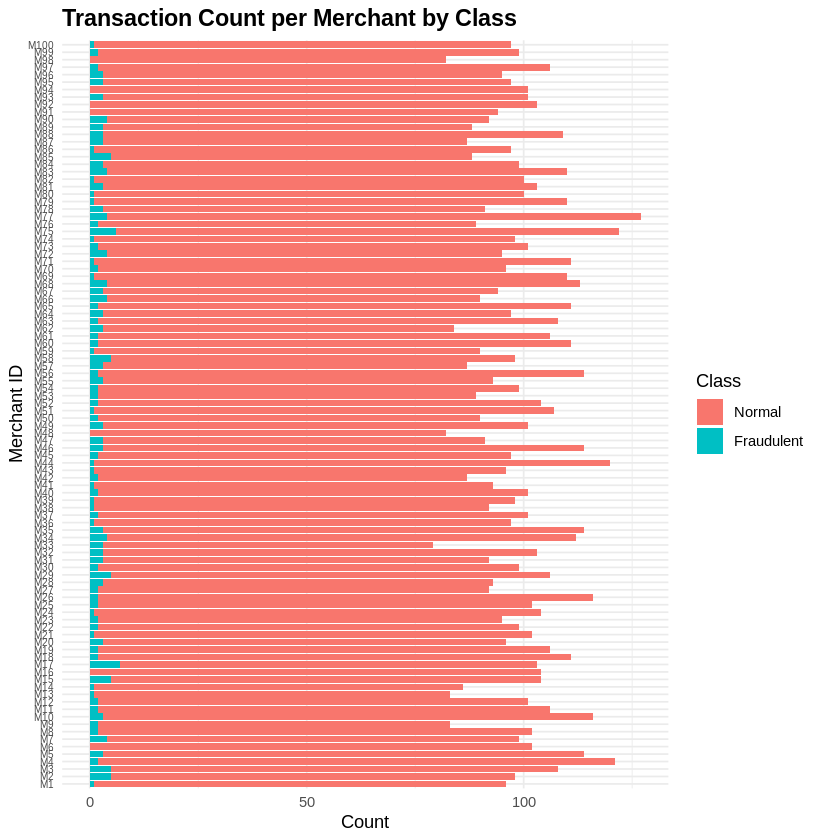

In [14]:
# Sorted by Natural Numeric Order
df %>%
  count(MerchantID, Class) %>%
  mutate(MerchantID = factor(MerchantID, levels = paste0("M", sort(as.numeric(gsub("M", "", unique(MerchantID))))))) %>%
  ggplot(aes(x = MerchantID, y = n, fill = Class)) +
  geom_col() +
  coord_flip() +
  labs(title = "Transaction Count per Merchant by Class", x = "Merchant ID", y = "Count") +
  theme_minimal()+
  theme(
    axis.text.y = element_text(size = 6),
    plot.title = element_text(size = 14, face = "bold")
  )

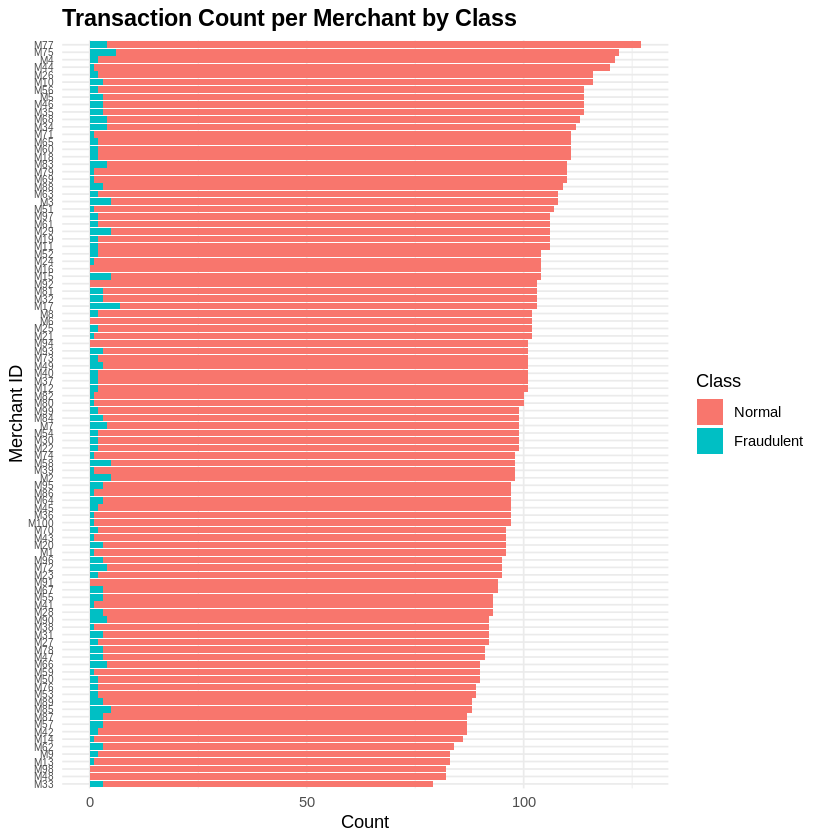

In [15]:
# Total Transaction Volume per Merchant
# This highlights the most active merchants (and potential exposure to fraud)
df %>%
  count(MerchantID, Class) %>%
  group_by(MerchantID) %>%
  mutate(Total = sum(n)) %>%
  ungroup() %>%
  mutate(MerchantID = fct_reorder(MerchantID, Total)) %>%
  ggplot(aes(x = MerchantID, y = n, fill = Class)) +
  geom_col() +
  coord_flip() +
  labs(
    title = "Transaction Count per Merchant by Class",
    x = "Merchant ID", y = "Count"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 6),
    plot.title = element_text(size = 14, face = "bold")
  )

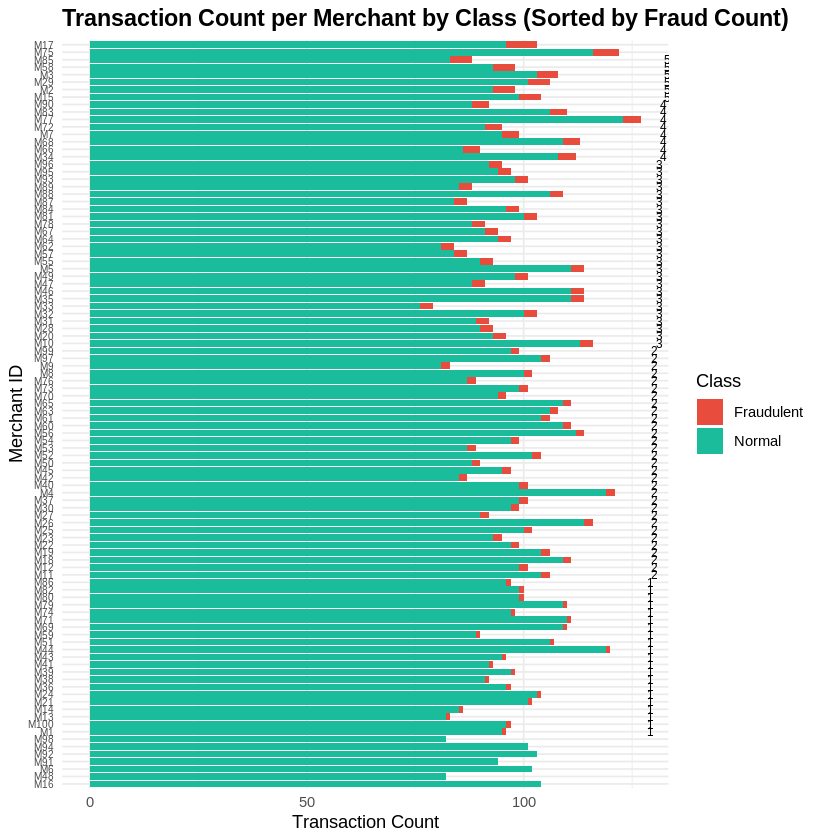

In [16]:
# Sort by Fraud Count
# Emphasize which merchants have more fraudulent activity
# Step 1: Clean data and compute total fraud counts per merchant
merchant_counts <- df %>%
  filter(!is.na(MerchantID) & MerchantID != "") %>%
  count(MerchantID, Class) %>%
  pivot_wider(names_from = Class, values_from = n, values_fill = 0) %>%
  mutate(
    Fraudulent = ifelse(is.na(Fraudulent), 0, Fraudulent),
    Total = Fraudulent + Normal,
    MerchantID = fct_reorder(MerchantID, Fraudulent)
  ) %>%
  pivot_longer(cols = c(Fraudulent, Normal), names_to = "Class", values_to = "n")
# Step 2: Plot with fraud count labels
ggplot(merchant_counts, aes(x = MerchantID, y = n, fill = Class)) +
  geom_col() +
  geom_text(
    data = merchant_counts %>% filter(Class == "Fraudulent" & n > 0),
    aes(x = MerchantID, y = n, label = n),
    hjust = -79,
    size = 2.5,
    inherit.aes = FALSE
  ) +
  coord_flip() +
  scale_fill_manual(values = c("Normal" = "#1ABC9C", "Fraudulent" = "#E74C3C")) +
  labs(
    title = "Transaction Count per Merchant by Class (Sorted by Fraud Count)",
    x = "Merchant ID",
    y = "Transaction Count",
    fill = "Class"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 6),
    plot.title = element_text(size = 14, face = "bold")
  )

In [17]:
# Correlation Matrix (for numeric vars)
cor(df %>% select(where(is.numeric)))

,Time,Amount
Time,1.000000000,0.008910714
Amount,0.008910714,1.000000000


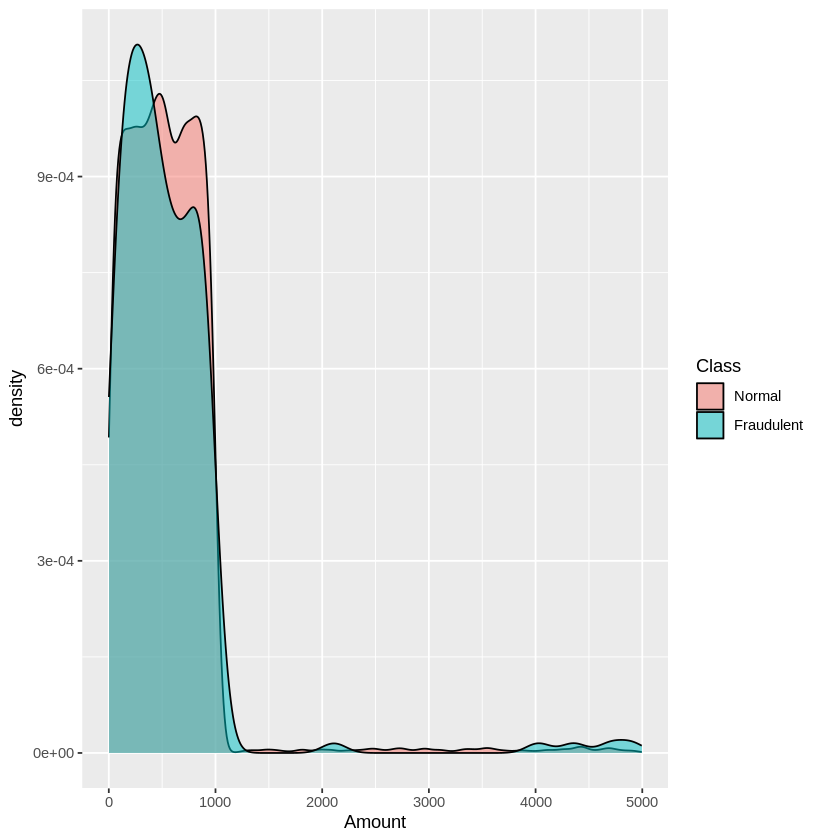

In [18]:
# Density Plots by Class
ggplot(df, aes(x = Amount, fill = Class)) +
  geom_density(alpha = 0.5)